In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             r2_score, mean_absolute_percentage_error)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\AutoJudge_v2\data\features_final.csv")
print(f"Dataset shape: {df.shape}")

Dataset shape: (4999, 518)


In [3]:
# Separating features and target
X = df.drop(['problem_class', 'problem_class_encoded', 'problem_score'], axis=1)
y = df['problem_score']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nScore statistics:")
print(y.describe())


Features shape: (4999, 515)
Target shape: (4999,)

Score statistics:
count    4999.000000
mean        5.202803
std         2.736784
min         1.000000
25%         3.050000
50%         5.090000
75%         7.550000
max        10.000000
Name: problem_score, dtype: float64


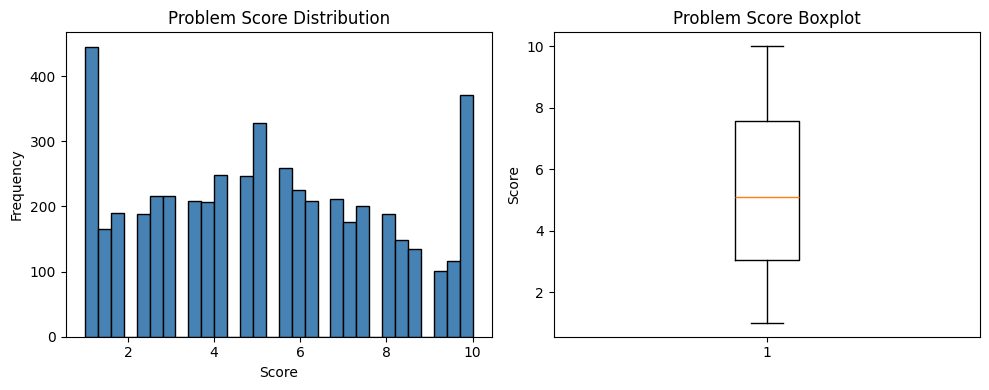

In [4]:
# Visualizing target distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(y, bins=30, color='steelblue', edgecolor='black')
plt.title('Problem Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(y, vert=True)
plt.title('Problem Score Boxplot')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

***Train-Test Split***

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"\nTraining score range: [{y_train.min():.2f}, {y_train.max():.2f}]")
print(f"Test score range: [{y_test.min():.2f}, {y_test.max():.2f}]")


Training set size: (3999, 515)
Test set size: (1000, 515)

Training score range: [1.00, 10.00]
Test score range: [1.00, 10.00]


***Model Training***

In [6]:
# Defining models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=1.0, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Training and evaluating all models
results = {}

for name, model in models.items():
    print(f"\n{'='*40}")
    print(f"Training {name}...")
    print('='*40)
    
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Evaluate
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2 = r2_score(y_test, y_pred_test)
    mape = mean_absolute_percentage_error(y_test, y_pred_test) * 100
    
    # Training metrics
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)
    
    # Cross-validation score (negative MAE)
    cv_scores = -cross_val_score(model, X_train, y_train, cv=5, 
                                  scoring='neg_mean_absolute_error')
    
    results[name] = {
        'model': model,
        'mae': mae,
        'rmse': rmse,
        'r2': r2,
        'mape': mape,
        'train_mae': train_mae,
        'train_r2': train_r2,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred_test
    }
    
    print(f"Test MAE: {mae:.4f}")
    print(f"Test RMSE: {rmse:.4f}")
    print(f"Test R² Score: {r2:.4f}")
    print(f"Test MAPE: {mape:.2f}%")
    print(f"Train MAE: {train_mae:.4f}")
    print(f"Train R² Score: {train_r2:.4f}")
    print(f"CV MAE: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


Training Linear Regression...
Test MAE: 1.6692
Test RMSE: 2.1046
Test R² Score: 0.3956
Test MAPE: 50.77%
Train MAE: 1.5089
Train R² Score: 0.5358
CV MAE: 1.7711 (+/- 0.0470)

Training Ridge Regression...
Test MAE: 1.6574
Test RMSE: 2.0520
Test R² Score: 0.4255
Test MAPE: 51.27%
Train MAE: 1.5499
Train R² Score: 0.5154
CV MAE: 1.7246 (+/- 0.0330)

Training Lasso Regression...
Test MAE: 2.2954
Test RMSE: 2.7080
Test R² Score: -0.0006
Test MAPE: 84.24%
Train MAE: 2.3098
Train R² Score: 0.0000
CV MAE: 2.3111 (+/- 0.0329)

Training Random Forest...
Test MAE: 1.5552
Test RMSE: 1.9453
Test R² Score: 0.4837
Test MAPE: 46.30%
Train MAE: 0.5975
Train R² Score: 0.9241
CV MAE: 1.6306 (+/- 0.0182)

Training Gradient Boosting...
Test MAE: 1.5608
Test RMSE: 1.9320
Test R² Score: 0.4907
Test MAPE: 47.92%
Train MAE: 1.3799
Train R² Score: 0.6183
CV MAE: 1.6188 (+/- 0.0106)


***Model Comparison***


             Model      MAE     RMSE  R² Score  MAPE (%)   CV MAE
Linear Regression 1.669194 2.104637  0.395615 50.768881 1.771107
 Ridge Regression 1.657430 2.051953  0.425495 51.269508 1.724572
 Lasso Regression 2.295426 2.707993 -0.000586 84.235239 2.311113
    Random Forest 1.555232 1.945324  0.483651 46.297173 1.630607
Gradient Boosting 1.560780 1.932049  0.490675 47.918501 1.618785


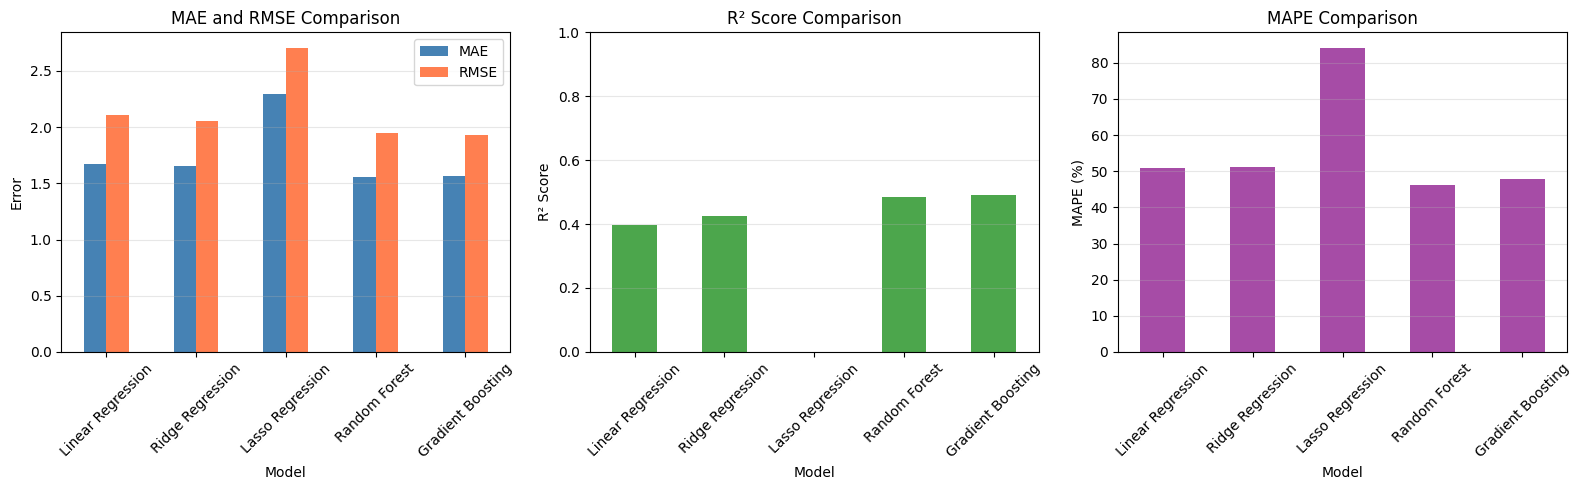

In [7]:
# comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'MAE': [r['mae'] for r in results.values()],
    'RMSE': [r['rmse'] for r in results.values()],
    'R² Score': [r['r2'] for r in results.values()],
    'MAPE (%)': [r['mape'] for r in results.values()],
    'CV MAE': [r['cv_mean'] for r in results.values()]
})

print("\n", comparison_df.to_string(index=False))

# Visualizing comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# MAE and RMSE
comparison_df.set_index('Model')[['MAE', 'RMSE']].plot(
    kind='bar', ax=axes[0], rot=45, color=['steelblue', 'coral']
)
axes[0].set_title('MAE and RMSE Comparison')
axes[0].set_ylabel('Error')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# R² Score
comparison_df.set_index('Model')['R² Score'].plot(
    kind='bar', ax=axes[1], rot=45, color='green', alpha=0.7
)
axes[1].set_title('R² Score Comparison')
axes[1].set_ylabel('R² Score')
axes[1].set_ylim([0, 1])
axes[1].grid(axis='y', alpha=0.3)

# MAPE
comparison_df.set_index('Model')['MAPE (%)'].plot(
    kind='bar', ax=axes[2], rot=45, color='purple', alpha=0.7
)
axes[2].set_title('MAPE Comparison')
axes[2].set_ylabel('MAPE (%)')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

***Best Model Selection & Fine-tuning***

In [8]:
# Finding best model based on MAE (lower is better)
best_model_name = min(results, key=lambda x: results[x]['mae'])
best_model = results[best_model_name]['model']

print(f"Best model: {best_model_name}")
print(f"Best MAE: {results[best_model_name]['mae']:.4f}")
print(f"Best R² Score: {results[best_model_name]['r2']:.4f}")

# Hyperparameter tuning for best model
print(f"\nPerforming hyperparameter tuning on {best_model_name}...")

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }
    base_model = RandomForestRegressor(random_state=42)
    
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
    base_model = GradientBoostingRegressor(random_state=42)
    
elif best_model_name == 'Ridge Regression':
    param_grid = {
        'alpha': [0.1, 1.0, 10.0, 100.0]
    }
    base_model = Ridge(random_state=42)
    
else:
    param_grid = {}
    base_model = best_model

if param_grid:
    grid_search = GridSearchCV(
        base_model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    
    print(f"\nBest parameters: {grid_search.best_params_}")
    print(f"Best CV MAE: {-grid_search.best_score_:.4f}")
    
    final_model = grid_search.best_estimator_
else:
    final_model = best_model

Best model: Random Forest
Best MAE: 1.5552
Best R² Score: 0.4837

Performing hyperparameter tuning on Random Forest...

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best CV MAE: 1.6220


***Final Model Evaluation***

In [9]:
# predictions
y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

# final metrics
train_mae = mean_absolute_error(y_train, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_r2 = r2_score(y_train, y_pred_train)

test_mae = mean_absolute_error(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)
test_mape = mean_absolute_percentage_error(y_test, y_pred_test) * 100

print("\nTraining Metrics:")
print(f"  MAE: {train_mae:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  R² Score: {train_r2:.4f}")

print("\nTest Metrics:")
print(f"  MAE: {test_mae:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  R² Score: {test_r2:.4f}")
print(f"  MAPE: {test_mape:.2f}%")


Training Metrics:
  MAE: 0.5925
  RMSE: 0.7461
  R² Score: 0.9260

Test Metrics:
  MAE: 1.5578
  RMSE: 1.9447
  R² Score: 0.4840
  MAPE: 46.73%


***Prediction Analysis***


Residual Statistics:
  Mean: -0.0258
  Std: 1.9455
  Min: -5.2631
  Max: 5.7954


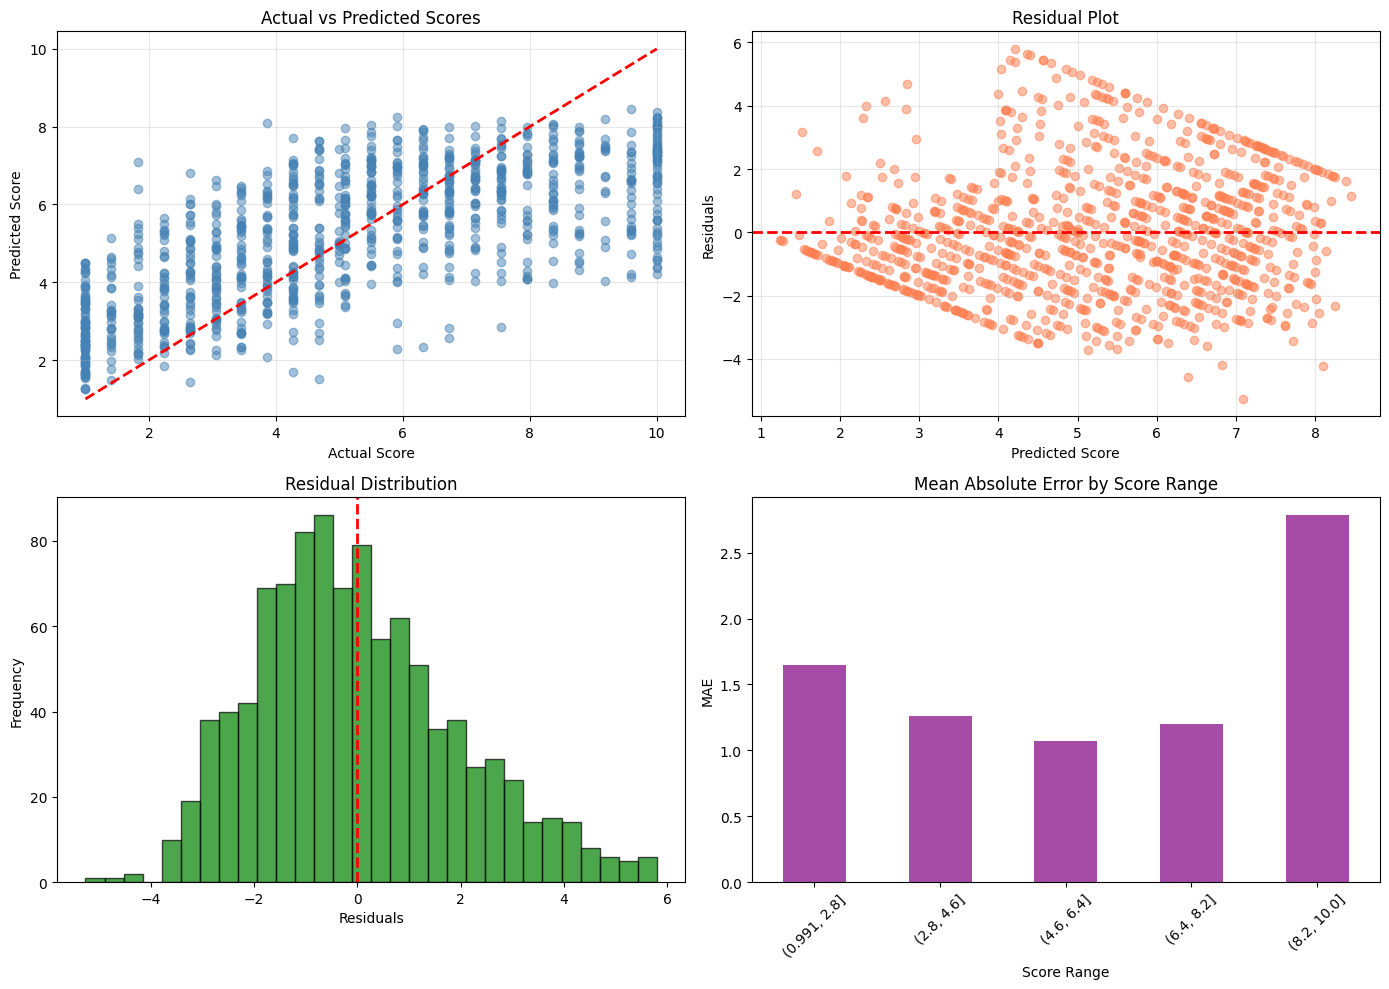

In [10]:
# residuals
residuals = y_test - y_pred_test

# Residual statistics
print("\nResidual Statistics:")
print(f"  Mean: {residuals.mean():.4f}")
print(f"  Std: {residuals.std():.4f}")
print(f"  Min: {residuals.min():.4f}")
print(f"  Max: {residuals.max():.4f}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred_test, alpha=0.5, color='steelblue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=2)
axes[0, 0].set_xlabel('Actual Score')
axes[0, 0].set_ylabel('Predicted Score')
axes[0, 0].set_title('Actual vs Predicted Scores')
axes[0, 0].grid(alpha=0.3)

# 2. Residual plot
axes[0, 1].scatter(y_pred_test, residuals, alpha=0.5, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Score')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(alpha=0.3)

# 3. Residual distribution
axes[1, 0].hist(residuals, bins=30, color='green', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Residual Distribution')
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)

# 4. Error distribution by score range
score_ranges = pd.cut(y_test, bins=5)
error_by_range = pd.DataFrame({
    'Range': score_ranges,
    'Error': np.abs(residuals)
}).groupby('Range')['Error'].mean()

error_by_range.plot(kind='bar', ax=axes[1, 1], color='purple', alpha=0.7)
axes[1, 1].set_title('Mean Absolute Error by Score Range')
axes[1, 1].set_ylabel('MAE')
axes[1, 1].set_xlabel('Score Range')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

***Error Analysis by class***


MAE by class:
class
medium    1.272561
hard      1.680748
easy      1.684747
Name: error, dtype: float64


<Figure size 1000x600 with 0 Axes>

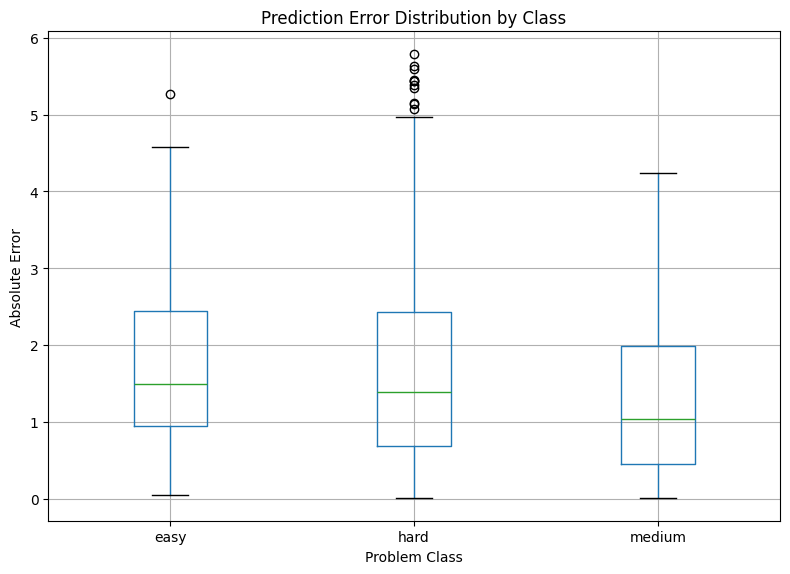

In [11]:
df_original = pd.read_csv(r"D:\AutoJudge_v2\data\features_final.csv")
y_test_index = y_test.index
test_classes = df_original.loc[y_test_index, 'problem_class']

error_by_class = pd.DataFrame({
    'class': test_classes,
    'actual': y_test.values,
    'predicted': y_pred_test,
    'error': np.abs(y_test.values - y_pred_test)
})

print("\nMAE by class:")
print(error_by_class.groupby('class')['error'].mean().sort_values())

# Visualizing
plt.figure(figsize=(10, 6))
error_by_class.boxplot(column='error', by='class', figsize=(8, 6))
plt.title('Prediction Error Distribution by Class')
plt.suptitle('')
plt.xlabel('Problem Class')
plt.ylabel('Absolute Error')
plt.tight_layout()
plt.show()

***Saving Model***

In [12]:
with open(r'D:\AutoJudge_v2\models\regression_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)
print("✓ Regression model saved to 'regression_model.pkl'")

# Saving results
regression_results = {
    'model_name': best_model_name,
    'train_mae': train_mae,
    'train_rmse': train_rmse,
    'train_r2': train_r2,
    'test_mae': test_mae,
    'test_rmse': test_rmse,
    'test_r2': test_r2,
    'test_mape': test_mape
}

with open(r'D:\AutoJudge_v2\models\regression_results.pkl', 'wb') as f:
    pickle.dump(regression_results, f)
print("✓ Regression results saved")

print("\n" + "="*50)
print("REGRESSION MODEL TRAINING COMPLETE!")
print("="*50)
print(f"Best Model: {best_model_name}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Model ready for predictions!")

✓ Regression model saved to 'regression_model.pkl'
✓ Regression results saved

REGRESSION MODEL TRAINING COMPLETE!
Best Model: Random Forest
Test MAE: 1.5578
Test RMSE: 1.9447
Test R² Score: 0.4840
Model ready for predictions!
